# 🔥 PyTorch เบื้องต้น: จำแนกรูปภาพตัวเลข MNIST ด้วย Neural Network

ยินดีต้อนรับสู่บทเรียน PyTorch สำหรับผู้เริ่มต้น! ใน Notebook นี้ เราจะพาคุณสร้างโมเดล Neural Network อย่างง่าย เพื่อจำแนกรูปภาพลายมือตัวเลขจาก MNIST dataset โดยใช้ PyTorch บน Jupyter Notebook (NECTEC environment หรือที่ใดก็ตามที่คุณใช้งานอยู่)

---

## 📘 บทนำ

**PyTorch** เป็นเฟรมเวิร์ก Deep Learning ยอดนิยม ที่พัฒนาโดย Meta (Facebook) ซึ่งโดดเด่นเรื่องความยืดหยุ่นและใช้งานง่าย โดยเฉพาะในการทำงานกับ GPU และการทดลองโมเดลต่างๆ

### 🧾 เกี่ยวกับ MNIST Dataset

**MNIST** คือชุดข้อมูลรูปภาพลายมือตัวเลข 0-9 ขนาด 28x28 พิกเซล (grayscale) ซึ่งเป็นหนึ่งในชุดข้อมูลที่ได้รับความนิยมที่สุดในการฝึกฝนการเรียนรู้เชิงลึก (Deep Learning)

- จำนวนภาพสำหรับฝึก (Train): 60,000 ภาพ  
- จำนวนภาพสำหรับทดสอบ (Test): 10,000 ภาพ  
- ขนาดแต่ละภาพ: 28x28 พิกเซล  
- ช่องสี: ขาวดำ (1 channel)

---

## 🛠️ ขั้นตอนที่ 1: เตรียมสภาพแวดล้อม (Environment Setup)

ก่อนเริ่มใช้งาน Jupyter Notebook และ PyTorch แนะนำให้สร้าง Python Environment แยกต่างหาก

### 🔹 1. สร้าง Virtual Environment
```bash
python -m venv env-pytorch
```

### 🔹 2. เปิดใช้งาน Environment
```bash
source env-pytorch/bin/activate
```

### 🔹 3. ติดตั้ง Library ที่จำเป็น
```bash
pip install -r requirements.txt
```

### 🔹 4. เพิ่ม Environment นี้ให้ Jupyter ใช้งาน
```bash
python -m ipykernel install --user --name=env-pytorch --display-name "Python (env-pytorch)"
```

---

## 🔄 ขั้นตอนที่ 2: เปิด Notebook และเลือก Kernel

เมื่อเปิด Jupyter Notebook แล้ว:

1. คลิกที่ชื่อ Kernel ปัจจุบัน (เช่น "Python 3") ที่มุมบนขวา
![ipykernel](../image/kernel.png)

3. เลือก Kernel ที่ชื่อ "Python (env-pytorch)" (ตามที่ตั้งไว้ในขั้นตอนก่อน)
![select ](../image/pythroch.png)
> 💡 หากยังไม่เห็นชื่อ Kernel นี้ ให้ลองปิด/เปิด Jupyter ใหม่ หรือเช็กคำสั่ง ipykernel อีกครั้ง

---

## 💻 ขั้นตอนที่ 3: เริ่มเขียนโค้ด PyTorch สำหรับ MNIST

จากนี้เราจะเริ่มสร้าง Neural Network ด้วย PyTorch เพื่อจำแนกรูปภาพตัวเลข MNIST กัน

---


### 📦 Cell 1: Import Libraries

เราจะเริ่มด้วยการนำเข้าไลบรารีที่จำเป็น:

- `torch` และ `torchvision`: ใช้งาน PyTorch และชุดข้อมูล
- `matplotlib`: สำหรับแสดงภาพ


In [3]:
# 📦 นำเข้าไลบรารีที่จำเป็นสำหรับการทำงาน
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

### 🔧 Cell 2: 📥 ดาวน์โหลดและเตรียมชุดข้อมูล MNIST

In [4]:
# 📥 ดาวน์โหลดและเตรียมชุดข้อมูล MNIST
# เราจะใช้ torchvision ที่ช่วยโหลดข้อมูลและแปลงข้อมูลได้ง่าย
transform = transforms.Compose([
    transforms.ToTensor(),                      # แปลงภาพให้เป็น Tensor
    transforms.Normalize((0.5,), (0.5,))        # ปรับค่าพิกเซลให้อยู่ในช่วง [-1, 1]
])

# โหลดชุดข้อมูล MNIST สำหรับเทรนและทดสอบ
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


100%|██████████| 9.91M/9.91M [00:12<00:00, 815kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 108kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.02MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.79MB/s]


### 🔧 Cell 2: 🖼️ แสดงตัวอย่างภาพจากชุดข้อมูล

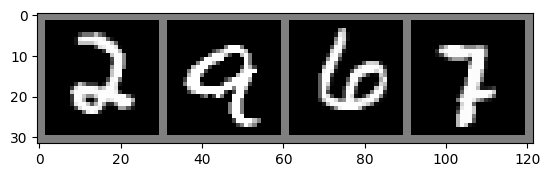

Labels: 2 9 6 7


In [6]:
# # 🖼️ แสดงตัวอย่างภาพจากชุดข้อมูล
def imshow(img):
    img = img / 2 + 0.5  # ย้อนค่าการ normalize กลับเป็นภาพปกติ
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# ดึง batch แรกจาก dataloader
dataiter = iter(trainloader)
images, labels = next(dataiter)

# แสดงภาพ 4 ภาพแรก
imshow(torchvision.utils.make_grid(images[:4]))
print("Labels:", ' '.join(f'{labels[j].item()}' for j in range(4)))


### 🔧 Cell 3: 🧠 นิยามโครงสร้างของ Neural Network อย่างง่าย

In [7]:
# 🧠 นิยามโครงสร้างของ Neural Network อย่างง่าย
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # ชั้น fully-connected แรก
        self.fc2 = nn.Linear(128, 64)       # ชั้นที่สอง
        self.fc3 = nn.Linear(64, 10)        # ชั้น output สำหรับจำแนก 10 หมวด

    def forward(self, x):
        x = x.view(-1, 28 * 28)             # แปลงภาพ 2D เป็น 1D
        x = torch.relu(self.fc1(x))         # ใช้ ReLU activation
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)                     # ไม่ใช้ softmax เพราะใช้ CrossEntropyLoss
        return x

net = Net()


### 🔧 Cell 4: ⚙️ นิยามฟังก์ชัน loss และ optimizer

In [8]:
# ⚙️ นิยามฟังก์ชัน loss และ optimizer
criterion = nn.CrossEntropyLoss()             # ใช้ cross-entropy สำหรับ classification
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


### 🔧 Cell 5: 🚂 เทรนโมเดล Neural Network

In [9]:
# 🚂 เทรนโมเดล Neural Network
for epoch in range(5):  # รันทั้งหมด 5 epoch
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # รีเซ็ต gradient ก่อนทุกครั้ง
        optimizer.zero_grad()

        # forward + backward + update
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:    # แสดงผลทุก 200 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 200:.3f}")
            running_loss = 0.0

print("Finished Training ✅")


[Epoch 1, Batch 200] loss: 1.030
[Epoch 1, Batch 400] loss: 0.420
[Epoch 1, Batch 600] loss: 0.337
[Epoch 1, Batch 800] loss: 0.298
[Epoch 1, Batch 1000] loss: 0.279
[Epoch 1, Batch 1200] loss: 0.247
[Epoch 1, Batch 1400] loss: 0.220
[Epoch 1, Batch 1600] loss: 0.223
[Epoch 1, Batch 1800] loss: 0.199
[Epoch 2, Batch 200] loss: 0.175
[Epoch 2, Batch 400] loss: 0.173
[Epoch 2, Batch 600] loss: 0.170
[Epoch 2, Batch 800] loss: 0.177
[Epoch 2, Batch 1000] loss: 0.155
[Epoch 2, Batch 1200] loss: 0.143
[Epoch 2, Batch 1400] loss: 0.168
[Epoch 2, Batch 1600] loss: 0.145
[Epoch 2, Batch 1800] loss: 0.147
[Epoch 3, Batch 200] loss: 0.120
[Epoch 3, Batch 400] loss: 0.122
[Epoch 3, Batch 600] loss: 0.130
[Epoch 3, Batch 800] loss: 0.127
[Epoch 3, Batch 1000] loss: 0.130
[Epoch 3, Batch 1200] loss: 0.112
[Epoch 3, Batch 1400] loss: 0.111
[Epoch 3, Batch 1600] loss: 0.116
[Epoch 3, Batch 1800] loss: 0.120
[Epoch 4, Batch 200] loss: 0.086
[Epoch 4, Batch 400] loss: 0.089
[Epoch 4, Batch 600] loss: 0

### 🔧 Cell 6: 💾 บันทึกโมเดลที่เทรนไว้

In [14]:
# 💾 บันทึกโมเดลที่เทรนไว้
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)


### 🔧 Cell 7: 🔁 โหลดโมเดลเพื่อใช้งานหรือทดสอบภายหลัง

In [15]:
# 🔁 โหลดโมเดลเพื่อใช้งานหรือทดสอบภายหลัง
net = Net()
net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

### 🔧 Cell 8: 🧪 ทดสอบความแม่นยำของโมเดลบนชุดข้อมูลทดสอบ

In [16]:
# 🧪 ทดสอบความแม่นยำของโมเดลบนชุดข้อมูลทดสอบ
correct = 0
total = 0
with torch.no_grad():  # ไม่ต้องเก็บ gradient
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on 10000 test images: {100 * correct / total:.2f}%")


Accuracy on 10000 test images: 97.20%


### 🔧 Cell 9: 👁️ แสดงภาพจาก test set พร้อม label และ prediction

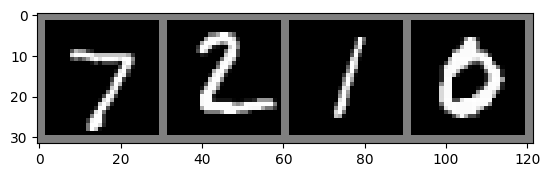

GroundTruth: 7 2 1 0
Predicted  : 7 2 1 0


In [17]:
# 👁️ แสดงภาพจาก test set พร้อม label และ prediction
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = net(images)

# แสดงภาพแรก
imshow(torchvision.utils.make_grid(images[:4]))
_, predicted = torch.max(outputs, 1)
print("GroundTruth:", ' '.join(f'{labels[j].item()}' for j in range(4)))
print("Predicted  :", ' '.join(f'{predicted[j].item()}' for j in range(4)))
